# Chapter 6: Machine Learning

In [ ]:
# import newsCorpora.csv file  at first

## 50. Download and Preprocess Dataset

ownload News Aggregator Data Set and create training data (train.txt), validation data (valid.txt) and test data (test.txt) as follows:

Unpack the downloaded zip file and read readme.txt.
Extract the articles such that the publisher is one of the followings: “Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com” and “Daily Mail”.
Randomly shuffle the extracted articles.
Split the extracted articles in the following ratio: the training data (80%), the validation data (10%) and the test data (10%). Then save them into files train.txt, valid.txt and test.txt, respectively. In each file, each line should contain a single instance. Each instance should contain both the name of the category and the article headline. Use Tab to separate each field.
After creating the dataset, check the number of instances contained in each category.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# load csv data using pandas libary
data = pd.read_csv('newsCorpora.csv' , delimiter = '\t' , header = None)

data.columns =['ID' , 'Title' , 'URL' , 'Publisher' , 'Category' , 'Story' , 'Hostname' , 'Timestamp' ]


# filter by Publisher
publishers = ["Reuters" , "Huffington Post" , "Businessweek" , "Contactmusic.com" , "Daily Mail" ]

filtered_data = data[data['Publisher'].isin(publishers)]
data.head(5)




,ID,Title,URL,Publisher,Category,Story,Hostname,Timestamp
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1.394470e+12
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1.394470e+12
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1.394470e+12


In [ ]:
# Shuffle data
filtered_data =filtered_data.sample(frac =1 , random_state= 42).reset_index(drop = True)

filtered_data.head(5)

,ID,Title,URL,Publisher,Category,Story,Hostname,Timestamp
0,2934,Comic film 'Neighbors' pits party-over against...,http://in.reuters.com/article/2014/03/10/film-...,Reuters,e,dEwcrt6LPSpnQZMj6PUU87nPXmo7M,in.reuters.com,1.394530e+12
1,1903,Maine gas prices go up another 2.4 cents a gallon,http://www.businessweek.com/ap/2014-03-10/main...,Businessweek,t,dQ1hBSN6YmfxF9Mwn5_M8L421ikbM,www.businessweek.com,1.394511e+12
2,2504,Bachelor Juan Pablo Galavis chooses Nikki Ferr...,http://www.dailymail.co.uk/tvshowbiz/article-2...,Daily Mail,e,dHmpog6unxaYYaMzYMEdbkeDeB9iM,www.dailymail.co.uk,1.394526e+12
3,2418,"Lindsay Lohan Misses Her AA Meeting, Blames Pa...",http://www.huffingtonpost.com/2014/03/10/linds...,Huffington Post,e,d-j0NxvRU7t3t8M-vJ--LXhVdVkvM,www.huffingtonpost.com,1.394521e+12
4,3409,'Chef' Is A Double Passion Project for Jon Fav...,http://www.contactmusic.com/article/jon-favrea...,Contactmusic.com,e,dcIVq7irVOe0J0M7GejS54hesarSM,www.contactmusic.com,1.394537e+12


In [ ]:
# split data into train_data , valid_data
train_data  , temp_data = train_test_split(filtered_data , test_size = 0.2 , random_state = 34)
valid_data , test_data = train_test_split(temp_data , test_size = 0.5 , random_state = 34)




In [ ]:
# save to files
def save_to_file(data , filename):
  data[['Category' , 'Title' ]].to_csv(filename , sep = '\t' , index = False , header = False)


save_to_file(train_data , 'train.txt')
save_to_file(valid_data , 'valid.txt')
save_to_file(test_data , 'test.txt')

#check the number of instances contained in each category
print(train_data['Category'].value_counts())
print(valid_data['Category'].value_counts())
print(test_data['Category'].value_counts())

Category
e    63
b    46
t    12
m     3
Name: count, dtype: int64
Category
e    8
b    7
t    1
Name: count, dtype: int64
Category
e    8
b    6
t    2
Name: count, dtype: int64


## 51. Feature extractionk
Extract a set of features from the training, validation and test data, respectively. Save the features into files as follows: train.feature.txt, valid.feature.txt and test.feature.txt. Design the features that are useful for the news classification. The minimum baseline for the features is the tokenized sequence of the news headline.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def extract_features(file, vectorizer=None):
    data = pd.read_csv(file, delimiter='\t', header=None, names=['Category', 'Title'])
    if vectorizer is None:
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(data['Title'])
    else:
        X = vectorizer.transform(data['Title'])
    return X, data['Category'], vectorizer

X_train, y_train, vectorizer = extract_features('train.txt')
X_valid, y_valid, _ = extract_features('valid.txt', vectorizer)
X_test, y_test, _ = extract_features('test.txt', vectorizer)

def save_features(X, y, filename):
    df = pd.DataFrame(X.toarray())
    df['Category'] = y.values
    df.to_csv(filename, sep='\t', index=False, header=False)

save_features(X_train, y_train, 'train.feature.txt')
save_features(X_valid, y_valid, 'valid.feature.txt')
save_features(X_test, y_test, 'test.feature.txt')


## 52. Training
Use the training data from the problem 51 and train the logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(X_train , y_train)

LogisticRegression(max_iter=1000)

## 53. Prediction
Use the logistic regression model from the problem 52. Create a program that predicts the category of a given news headline and computes the prediction probability of the model.

In [ ]:
def predict_category(headline, model, vectorizer):
    X = vectorizer.transform([headline])
    prediction = model.predict(X)
    probability = model.predict_proba(X)
    return prediction[0], probability.max()

headline = "mahara chitra has completed graduation from kcgi"
category, prob = predict_category(headline, model, vectorizer)
print(f"Predicted Category: {category}, Probability: {prob}")



Predicted Category: e, Probability: 0.42188790133653353


## 54. Accuracy score
Compute the accuracy score of the logistic regression model from the problem 52 on both the training data and the test data

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 0.8125


## 55. Confusion matrix
Create the confusion matrix of the logistic regression model from the problem 52 for both the training data and the test data

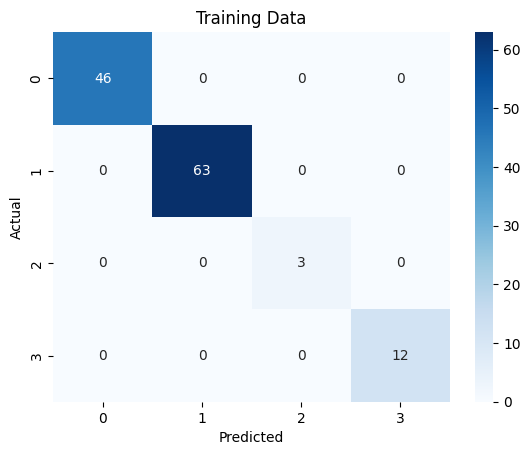

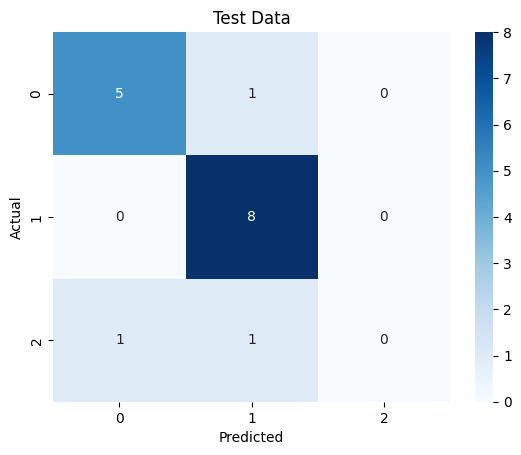

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')  # changed fmt='d' to fmt='g'
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_train, model.predict(X_train), 'Training Data')
plot_confusion_matrix(y_test, model.predict(X_test), 'Test Data')




## 56. Precision, recall and F1 score
Compute the precision, recall and F1 score of the logistic regression model from the problem 52. First, compute these metrics for each category. Then summarize the score of each category using (1) micro-average and (2) macro-average

In [ ]:
from sklearn.metrics import classification_report

def compute_metrics(y_true , y_pred) :
 report = classification_report(y_true , y_pred , output_dict = True)
 return report

# function call
train_metrics = compute_metrics(y_train , model.predict(X_train))
test_metrics = compute_metrics(y_test , model.predict(X_test))

print(f"Training Metrics :{train_metrics}")
print(f"Test Metrics : {test_metrics}")


Training Metrics :{'b': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 46}, 'e': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 63}, 'm': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 't': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 124}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 124}}
Test Metrics : {'b': {'precision': 0.8333333333333334, 'recall': 0.8333333333333334, 'f1-score': 0.8333333333333334, 'support': 6}, 'e': {'precision': 0.8, 'recall': 1.0, 'f1-score': 0.888888888888889, 'support': 8}, 't': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, 'accuracy': 0.8125, 'macro avg': {'precision': 0.5444444444444444, 'recall': 0.6111111111111112, 'f1-score': 0.5740740740740741, 'support': 16}, 'weighted avg': {'precision': 0.7125, 'recall': 0.8125, 'f1-score': 0.756944444

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 57. Feature Weight
Use the logistic regression model from the problem 52. Check the feature weights and list the 10 most important features and 10 least important features.

In [ ]:
import numpy as np

def get_feature_weights(model, vectorizer):
    feature_names = vectorizer.get_feature_names_out()
    weights = model.coef_[0]
    features_weights = sorted(zip(feature_names, weights), key=lambda x: x[1], reverse=True)
    return features_weights

features_weights = get_feature_weights(model, vectorizer)
print("Top 10 Important Features:")
print(features_weights[:10])
print("Bottom 10 Important Features:")
print(features_weights[-10:])


Top 10 Important Features:
[('china', 0.7558132486123653), ('us', 0.5464794264770354), ('ukraine', 0.51798327786843), ('banana', 0.47962466518687236), ('weak', 0.3992575922554341), ('stocks', 0.37574645528238876), ('low', 0.37033423579200103), ('ecb', 0.3607670650393524), ('euro', 0.353905214459094), ('chiquita', 0.34303817131322856)]
Bottom 10 Important Features:
[('opponents', -0.2931335100238518), ('ruse', -0.2931335100238518), ('neighbors', -0.3101636409998442), ('dunham', -0.31549705818095586), ('lena', -0.31549705818095586), ('cyrus', -0.3218049548791745), ('miley', -0.3218049548791745), ('new', -0.3524625906991542), ('it', -0.3891310316861338), ('and', -0.42914790976763206)]


## 58. Regularization
When training a logistic regression model, one can control the degree of overfitting by manipulating the regularization parameters. Use different regularization parameters to train the model. Then, compute the accuracy score on the training data, validation data and test data. Summarize the results on the graph, where x-axis is the regularization parameter and y-axis is the accuracy score.

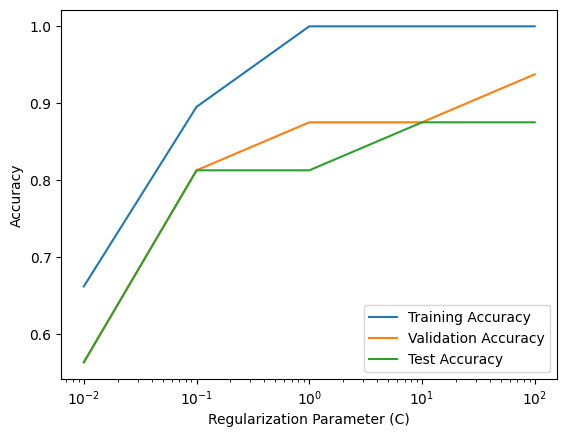

In [ ]:
import matplotlib.pyplot as plt

C_values = [0.01, 0.1, 1, 10, 100]
train_accuracies = []
valid_accuracies = []
test_accuracies = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    valid_accuracies.append(accuracy_score(y_valid, model.predict(X_valid)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(C_values, train_accuracies, label='Training Accuracy')
plt.plot(C_values, valid_accuracies, label='Validation Accuracy')
plt.plot(C_values, test_accuracies, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 59. Hyper-parameter tuningPermalink
Use different training algorithms and parameters to train the model for the news classification. Search for the training algorithms and parameters that achieves the best accuracy score on the validation data. Then compute its accuracy score on the test data.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy with Best Model: {test_accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 100, 'solver': 'lbfgs'}
Test Accuracy with Best Model: 0.875
